## Car Price Prediction Analysis

#### Dataset Features
1. Car Brand
2. Year
3. Sold Price
4. Present Price
5. KMS Driven
6. Fuel Type
7. Seller Type
8. Transmission Type
9. Owners

#### Work Flow
Car Data ---> Data Pre-processing ---> Train Test Split ---> Linear & Lasso Regression model     
New Data ---> Trained Linear & Lasso Regression model

### Modules / Libraries

In [1]:
# importing modules/libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Car Data

In [2]:
# loading the data
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# checking the size of the dataset
car_data.shape

(301, 9)

### Data Pre-processing

In [4]:
# checking for missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
# checking for data types
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


###### checking the distribution of categorical columns

In [6]:
# Fuel type
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
# Seller type
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
# Transmission
car_data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

##### label encoding

In [15]:
# lable encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [16]:
# lable encoding fuel type
car_data['Fuel_Type'] = label_encoder.fit_transform(car_data['Fuel_Type'])

# lable encoding seller type
car_data['Seller_Type'] = label_encoder.fit_transform(car_data['Seller_Type'])

# lable encoding transmission
car_data['Transmission'] = label_encoder.fit_transform(car_data['Transmission'])

### Train Test Split

##### Training the data

In [20]:
# separate the data into lable and target
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [24]:
# checking X
X.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0


In [25]:
# checking y
y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [23]:
# training the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


##### Training the model

###### Model 1 (Linear Regression)

In [28]:
# linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X,y)

LinearRegression()

### Model Evaluation

In [29]:
# prediction on training data
train_data_prediction = linear_reg_model.predict(X_train)

In [30]:
# R Squared error
error_score = metrics.r2_score(y_train, train_data_prediction)
print(f"R Squared error score: {error_score}")

R Squared error score: 0.8829883846188673


##### Visualizing the Actual prices and Predicted prices

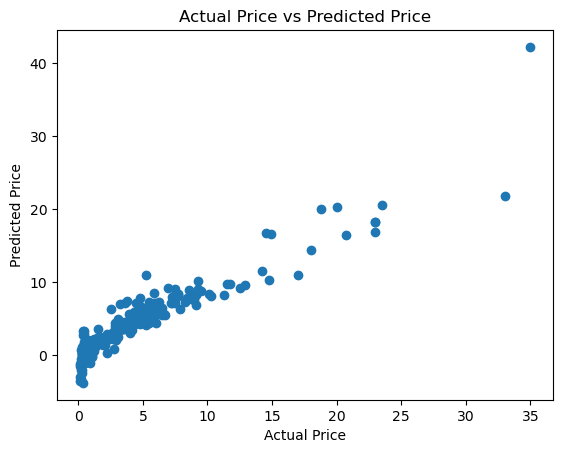

In [32]:
# visualization for the training data
plt.scatter(y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [33]:
# prediction on testing data
test_data_prediction = linear_reg_model.predict(X_test)

In [34]:
# R Squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R Squared error score: {error_score}")

R Squared error score: 0.8515853482625322


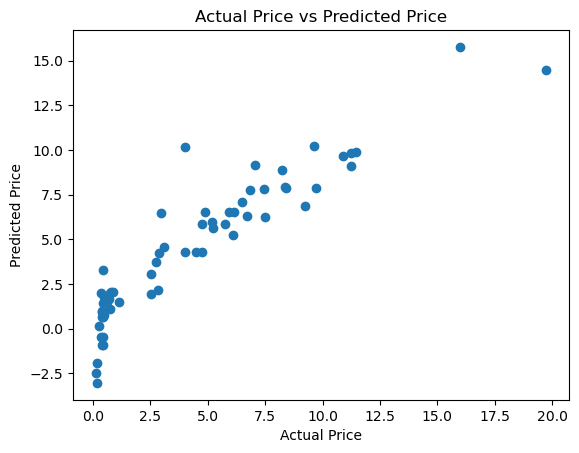

In [35]:
# visualization for the testing data
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

##### Model 2 (Lasso Regression)

In [38]:
# lasso regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X,y)

Lasso()

### Model Evaluation

In [42]:
# prediction on training data
train_data_prediction = lasso_reg_model.predict(X_train)

In [43]:
# R Squared error
error_score = metrics.r2_score(y_train, train_data_prediction)
print(f"R Squared error score: {error_score}")

R Squared error score: 0.8419149930946818


##### Visualizing the Actual prices and Predicted prices

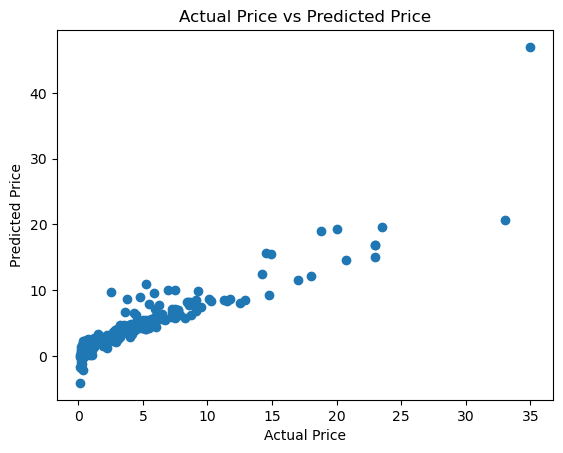

In [44]:
# visualization for the training data
plt.scatter(y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [45]:
# prediction on testing data
test_data_prediction = lasso_reg_model.predict(X_test)

In [46]:
# R Squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R Squared error score: {error_score}")

R Squared error score: 0.8513151208957765


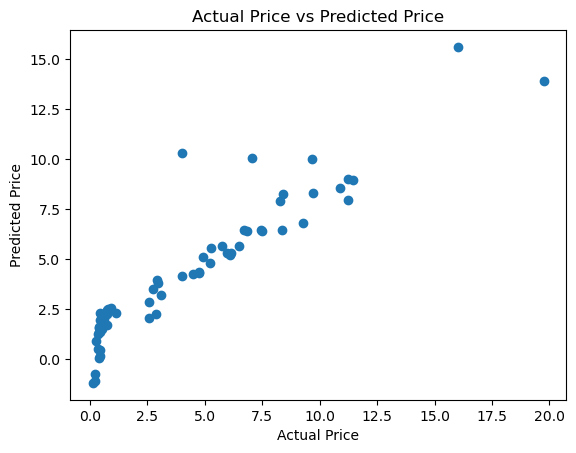

In [47]:
# visualization for the testing data
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()